# Geometric Transformations of Images
이미지의 기하학적 변환

## Goals

* Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
* You will see these functions: `cv2.getPerspectiveTransform`

## Transformations

> ## Trnasformation이란?
> The function to conver an specific coordinate **x** into other coodinate system **x'**
특정한 좌표를 다른 좌표계로

* Rigid-body transformation : size and angle are preserved. (i.e., **Translation**, **Rotation**)
크기와 각도 보존(이동, 회전)
* Similarity transformation : angle is preserved but size can be changed. (i.e., **Scaling**)
각도는 보존 되나 크기가 달라짐(크기 조정).
* Linear transformation : Function to mapping on the vector space. It specifies homogeniety and addivity.
선형변환. 유사 변환에 크기변환,반사,기울임이 추가되고 이동변환이 제외 된다.(linear는 원점으로 가게됨.)
* Affine transformation : Linear transfomation + Translation. Function between affine spaces which preserves points, straight lines and planes.
(linear에 가장 기본적인 translation을 포함한게 affine)
여기까지는 직선은 직선으로 보전, 평행선은 평행선으로 보전됨.
* Perspective transformation (원근변환) : Affine transformation w/o the property to keep parallel lines
변환 전의 평행한 선은 변환 후 유지될 수도 있고 안될 수도 있다.
기하학적인 변환. 

OpenCV provides two transformation functions, 
* `cv2.warpAffine` and 
Rigid, Similarity, Linear, Affine 가능
* `cv2.warpPerspective`, with which you can have all kinds of transformations.
perspective transformation 가능

`cv2.warpAffine` takes a 2x3 transformation matrix while `cv2.warpPerspective` takes a 3x3 transformation matrix as input.

translation => x축으로 a만큼, y축으로 b만큼, z축으로 c만큼 움직였다. ==> 세개의 파라미터만 있으면 됨. +rotation도 표현 가능.
2*3 이라는게 6개만 있으면(3쌍) 다 처리 가능.
=> 이 점은 여기로 갔고, 이 점은 저기로 갔고, 이 점은 쪼기로 갔어. 라는 식으로 3개의 점만 있으면 됨.
perspective는 6개의 자유도는 부족하므로 3*3인 자유도 9(실질적으로는 9-1(확대제외))로 표현 가능. 8개의 자유도를 가진다고 할 수 있음(4쌍)
=>4개의 점 필요

Warping Transformation => 직선이 곡선으로 바뀜. 비선형성.

## Scaling

Scaling is just 'resizing' of the image. 

OpenCV comes with a function `cv2.resize()` for this purpose. 

> **cv2.resize(img, dsize, fx, fy, interpolation)**
> * img : source image
> * dsize : desired size (specified manually), tuple (width,height)
희망하는 사이즈
> * fx : scale factor along the horizontal axis
수평
> * fy : scale factor along the vertical axis
수직
> * interpolation
보간법.  알고 있는 데이터 값들을 이용하여 모르는 값을 추정하는 방법의 한 종류

The size of the image can be specified manually, or you can specify **the scaling factor**. 

Different **interpolation method**s are used. 
  Preferable interpolation methods are `cv2.INTER_AREA` for **shrinking** and `cv2.INTER_CUBIC` (slow) & `cv2.INTER_LINEAR` for **zooming**. 
  INTER_AREA는 가장 많이 씀. 퀄리티 괜찮음.
  shrinking(줄이기) zooming(확대축소)
  By default, interpolation method used is `cv2.INTER_LINEAR` for all resizing purposes. 
  
  Various interpolation alogrithms are provided by opencv as follows;
  * cv2.INTER_AREA
    * It is perferred for shrinking the image size.
    shrinking 전용
  * cv2.INTER_LINEAR
    * default algorithm.
    * It is commonly used for zooming.
  * cv2.INTER_CUBIC
    * It is used for zooming with a better quality but slow.
  * cv2.INTER_NEAREST
    * Very fast but quaility is not good.
    가장 가까운 값으로 치환. 실질적으로 많이 쓰지 않음.

You can resize an input image either of following methods:

In [3]:
import cv2
import numpy as np

img = cv2.imread('cat_cv.tif')

height,width,channel = img.shape
# height, width = img.shape[:2] #두개로 쓰겠다. 라는 뜻.

#-------------------
print("original dimension : ({}, {}, {})".format(height,width,channel))
cv2.imshow('img',img)
zoomed_cat = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#가로 2배, 세로 2배로 늘어남.(=> 면적 4배)
#[[2,0,0],
#[0,2,0]]) 을 사용한다는 의미.

#OR

zoomed_cat2 = cv2.resize(img,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
#It is used for zooming with a better quality but slow.
#-------------------

print("modified dimension :",zoomed_cat.shape)
cv2.imshow('zoomed_cat2',zoomed_cat2)
# cv2_imshow(zoomed_cat)

zoomed_cat2_NN = cv2.resize(img, (2*width,2*height), interpolation = cv2.INTER_NEAREST)
#Very fast but quaility is not good. 눈 보면 티남.
cv2.imshow('zoomed_cat2_NN',zoomed_cat2_NN)
#cv2_imshow(zoomed_cat_NN)

cv2.waitKey(0)
cv2.destroyAllWindows()

original dimension : (300, 451, 3)
modified dimension : (600, 902, 3)


In [4]:
import cv2
import numpy as np

img = cv2.imread('cat_cv.tif', 0)

def custom_zoom(src, x):
    height, width = img.shape[:2]
    zoomed_cat_NN = cv2.resize(img,None,fx=x, fy=x, interpolation = cv2.INTER_NEAREST)
    return zoomed_cat_NN

zoomed_cat2 = custom_zoom(img, 1.5)

cv2.imshow('img',img)
cv2.imshow('zoomed_cat2',zoomed_cat2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Review : Cropping

In opencv, cropping is provided by using the slicing of python. Slicing an array is just taking the array values within pariticular index range.

In [ ]:
import matplotlib.pyplot as plt

zoomed_cat_NN = cv2.resize(img, (2*width,2*height), interpolation = cv2.INTER_NEAREST)
#위에서 정의 안해줘서 2배로 새로 정의해줌

zoomed_cat = cv2.cvtColor(zoomed_cat,cv2.COLOR_RGB2BGR)
zoomed_cat_NN = cv2.cvtColor(zoomed_cat_NN,cv2.COLOR_RGB2BGR)

cropped_img0 = zoomed_cat[150:300,250:450]
#cv2_imshow(cropped_img0)
cropped_img1 = zoomed_cat_NN[150:300,250:450]
#cv2_imshow(cropped_img1)

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(cropped_img0) # expects distored color
plt.subplot(122); plt.imshow(cropped_img1) # expects true color
#화질은 cat>NN 따라서 img0>>img1(왼쪽이 화질이 더 좋음.)
plt.show()


#--------------------------------------
# be careful to modify the cropped img.
tmp = cropped_img0.copy()
cropped_img0[:]=0
#크롭한 부분을 0으로 만듦.(검은색) 255로 하면 흰색됨.

#cv2_imshow(zoomed_cat)
#cv2_imshow(tmp)
plt.imshow(zoomed_cat)
plt.show()
plt.imshow(tmp)
#크롭된 부분만 보여줌.
plt.show()

zoomed_cat[150:300,250:450]=tmp
#크롭한 부분을 크롭된 사진에 합침=> 원본상태로 돌아감
#cv2_imshow(zoomed_cat)
plt.imshow(zoomed_cat)
plt.show()

## Translation
이동

Translation is the shifting of object’s location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $\textbf{M}$ as follows:

$$
M = \begin{bmatrix} 
1 & 0 & t_x \\ 
0 & 1 & t_y  
\end{bmatrix}
$$
제일 아래 날라간 행렬은 0 0 1

You can take make it into a **Numpy array of type** `np.float32` and pass it into `cv2.warpAffine()` function. 
계산결과값이 실수가 될 수 있기 때문에 float 사용

See below example for a shift of (100,50):

In [1]:
import cv2
import numpy as np

img = cv2.imread('cat_cv.tif',0)
rows,cols = img.shape

M = np.float32([[1,0,100],
                [0,1,50]])
#t_x가 100 t_y가 50인 상태
#가로로 100만큼, 세로로 50만큼 이동
#음수도 가능. 양수는 오른쪽으로 이동 음수는 왼쪽으로 이동
#이동한 다른 부분은 빈칸으로 나옴.


dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
from skimage import data
from skimage import img_as_ubyte,img_as_float
import cv2
import numpy as np
import matplotlib.pyplot as plt

astro = data.astronaut() # take the test image of astro!
img = cv2.cvtColor(astro, cv2.COLOR_RGB2GRAY)
# img = cv2.imread('cat_cv.tif',0)

rows,cols = img.shape

def move(x, y):
  M = np.float32([[1,0,x],
                [0,1,y]])
  return M

dst = cv2.warpAffine(img,move(100,30),(cols,rows))

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'), plt.axis('off')
plt.show()

## Rotation
회전

Rotation of an image for an angle $\theta$ can also be done using `wrapAffine()`--only the transformation matrix changes.

The transformation matrix for the rotation is as follows:

$$
M = \begin{bmatrix} 
cos\theta & -sin\theta \\ 
sin\theta & cos\theta   
\end{bmatrix}
$$
꼬마신신고
이건 원점을 기준으로 변환이 됨. =>원점은 왼쪽 아래 꼭짓점

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$$
\begin{bmatrix} 
\alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ 
- \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y 
\end{bmatrix}
$$
회전변환을 지정한  세타가 원점이 되게 만들고, 회전을 시키고, 다시 역변환을 해서 제자리도 돌아오게 만드는 과정이 합쳐져 있음.
where:

$$
\begin{array}{l} 
\alpha =  scale \cdot \cos \theta , \\ 
\beta =  scale \cdot \sin \theta 
\end{array}
$$
이 식은 scale 까지 포함되어있음.

To find this transformation matrix, OpenCV provides a function, `cv2.getRotationMatrix2D`. 
It takes the center for rotation, angle of rotation, and scaling factor as input.
중심에서 회전 각에서 회전, 비례축소요소

Check below example which rotates the image by 90 degree with respect to center without any scaling.

In [41]:
?cv2.getRotationMatrix2D

Docstring:
getRotationMatrix2D(center, angle, scale) -> retval
.   @brief Calculates an affine matrix of 2D rotation.
.   
.   The function calculates the following matrix:
.   
.   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
.   
.   where
.   
.   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
.   
.   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
.   
.   @param center Center of the rotation in the source image.
.   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
.   coordinate origin is assumed to be the top-left corner).
.   @param scale Isotropic scale factor.
.   
.   @sa  getAffineTransform, warpAffine, transform
Typ

In [24]:
img = cv2.imread('cat_cv.tif',0)
rows,cols = img.shape # there is no channel

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
#반시계방향으로 90도 회전
#-90 시 시계방향으로 90도 회전.
#그림회전 = cv2.getRotationMatrix2D(회전중심, 회전각도, 1) # 1은 확대/축소값
#cols/2, rows/2 니까 중심을 기준으로 확대 없이 90도 회전한 것.

dst = cv2.warpAffine(img,M,(cols,rows))
#회전결과 = cv2.warpAffine(그림RGB, 그림회전, (새세로, 새가로))
cv2.imshow('original img', img)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

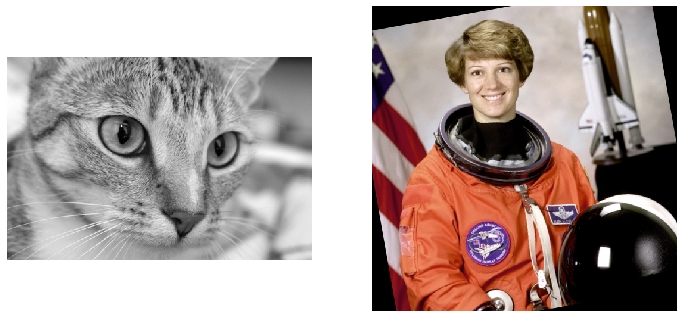

In [28]:
def custom_rotate(tempimg, x):
    if len(tempimg.shape) == 3 : #for color image
        rows, cols,_=tempimg.shape
    else: #for grayscale image
        rows,cols = tempimg.shape # there is no channel
    #------------------------------------
    # getRotationMatrix2D
    # the rotation center is given by Tupple.
    # (center.x cneter.y), rotation degree, scale
    M = cv2.getRotationMatrix2D((cols/2,rows/2),x,1)
    tempdst = cv2.warpAffine(tempimg,M,(cols,rows))
    return tempdst

img = cv2.imread('cat_cv.tif',0)
img2 = data.astronaut()
dst = custom_rotate(img2, 10)

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'), plt.axis('off')
plt.show()

## Affine Transformation
아핀 변환 행렬을 찾으려면 입력 이미지의 3점과 대응하는 출력 이미지의 3점이 필요하다.
In affine transformation, all parallel lines in the original image will still be parallel in the output image. 
평행선->평행선

To find the transformation matrix, we need **three points** from input image and their corresponding locations in output image. 

Then `cv2.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv2.warpAffine`.

Check below example, and also look at the points I selected (which are marked in Green color):

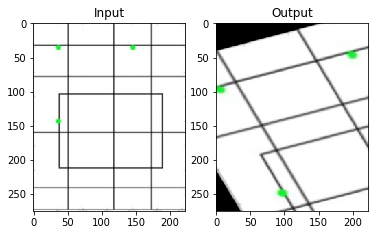

In [53]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[38,38],[145,38],[38,145]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
#(38,38)을 (10,100)에 매칭.
#(145,38)을 (200,50)에 매칭.
#(38,145)을 (100,250)에 매칭.
#그래서 입력 이미지 3과 대응하는 출력 이미지 3이 필요한 것.

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))
#row 행 column 열
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
#subplot(121)=>1행 2열의 1번째 index
plt.show()

In [6]:
#00_03 Mouse as Paint-Brush 참고

import cv2
import numpy as np

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK: # double click event!
        global points
        cv2.circle(img,(x,y),10,(255,0,0),-1) #(255,0,0)BGR기준 파란색, 닫힌 도형에서 -1은 도형 채우기. 디폴트 값 1(채우기는 없고 선만 존재), 10=>원 크기. 반지름
        print(x,y)
        points.append([x,y])
        
        
# Create a black image, a window and bind the function to window
img = cv2.imread('drawing.png')
rows,cols,ch = img.shape
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
    if len(points) == 3:#점이 세개가 되면
        pts1 = np.float32(points)
        pts2 = np.float32([[10,100],[200,50],[100,250]])#매칭
        M = cv2.getAffineTransform(pts1,pts2)        
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2.imshow('after',dst)
        
cv2.destroyAllWindows()

55 39
177 63
116 213


## Perspective Transformation
원근 변환

For perspective transformation, you need a 3x3 transformation matrix. 

Straight lines will remain straight even after the transformation. 
* Perspective(원근법) 변환은 선의 성질만 유지(직선은 변환 후에도 직선)
* 단, 선의 평행성은 유지가 되지 않음

To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. 
* Among these 4 points, 3 of them should not be collinear. 
4개중 3개가 동일선상에 있으면 안됨.

Then transformation matrix can be found by the function `cv2.getPerspectiveTransform`. 

Then apply `cv2.warpPerspective` with this 3x3 transformation matrix.

See the code below:

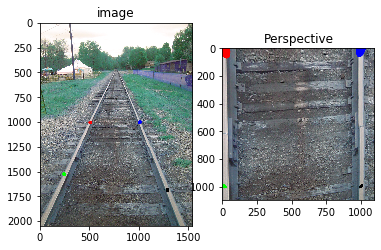

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Railroad-Tracks-Perspective.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1280,1685]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])
#똑바로 펴기 위한 좌표임

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 20, (255,0,0),-1)#R
cv2.circle(img, (243,1524), 20, (0,255,0),-1)#G
cv2.circle(img, (1000,1000), 20, (0,0,255),-1)#B
cv2.circle(img, (1280,1685), 20, (0,0,0),-1)#검은색

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))#1100,1000 size

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()


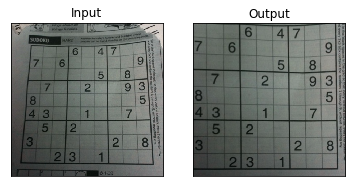

In [34]:
img = cv2.imread('sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[62,69],[392,54],[31,404],[413,410]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.xticks([]);plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.xticks([]);plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        print(x,y)
        points.append([x,y])
        
        
# Create a black image, a window and bind the function to window
img = cv2.imread('sudoku.png')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
    if len(points) == 4:
        pts1 = np.float32(points)
        pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
        M = cv2.getPerspectiveTransform(pts1,pts2)        
        dst = cv2.warpPerspective(img,M,(300,300))
        cv2.imshow('after',dst)
        
cv2.destroyAllWindows()

74 84


In [ ]:
'''
input: the image that you want rotated.
output: the Mat object to put the resulting file in.
alpha: the rotation around the x axis
beta: the rotation around the y axis
gamma: the rotation around the z axis (basically a 2D rotation)
dx: translation along the x axis
dy: translation along the y axis
dz: translation along the z axis (distance between lens and the object) (commonly use 200)
f: focal distance (distance between lens and image, a smaller number exaggerates the effect)

Author : Michael Jepson 
Original src : C++ 
Original src's URL : http://jepsonsblog.blogspot.com/2012/11/rotation-in-3d-using-opencvs.html
'''
def rotateImage(input, alpha, beta, gamma, dx, dy, dz, f):
    #alpha = (alpha - 90.)*np.pi/180.;
    #beta = (beta - 90.)*np.pi/180.;
    #gamma = (gamma - 90.)*np.pi/180.;
    alpha = (alpha)*np.pi/180.;
    beta = (beta)*np.pi/180.;
    gamma = (gamma)*np.pi/180.;
    
    
    # get width and height for ease of use in matrices
    h,w = input.shape[:2]
    print('height:',h,'width:',w)
    
    # Projection 2D -> 3D matrix
    A1 = np.array([
        [1,0,-w/2.],
        [0,1,-h/2.],
        [0,0,0],
        [0,0,1]])
    
    # Rotation matrices around the X, Y, and Z axis
    RX = np.array([
        [1,0,0,0],
        [0,np.cos(alpha),-np.sin(alpha),0],
        [0,np.sin(alpha), np.cos(alpha),0],
        [0,0,0,1]])
    
    RY = np.array([
        [np.cos(beta),0,-np.sin(beta),0],
        [0           ,1,            0,0],
        [np.sin(beta),0, np.cos(beta),0],
        [0,0,0,1]])
    
    RZ = np.array([
        [np.cos(gamma),-np.sin(gamma),0,0],        
        [np.sin(gamma), np.cos(gamma),0,0],
        [0           ,0,            1,0],
        [0,0,0,1]])
    
    # Composed rotation matrix with (RX, RY, RZ)
    R = np.dot(RZ,np.dot(RY,RX))
    R2 = RZ@RY@RX#@은 매트릭스 곱
    if not(np.array_equal(R2,R)):
        print(R2-R)
    
    # Translation matrix
    T = np.array([
        [1,0,0,dx],        
        [0,1,0,dy],
        [0,0,1,dz],
        [0,0,0,1]])
    
    A2 = np.array([#3D에서 2D로
        [f,0,w/2.,0],        
        [0,f,h/2.,0],        
        [0,0,1,0]])
    
    # Final transformation matrix       
    M2 = np.dot(A2,np.dot(T,np.dot(R,A1)))
    M = A2 @ (T @ (R @ A1))
    if not(np.array_equal(M2,M)):
        print(M2-M)
    print(M)#최종 매트릭스 M
    
    
    
    dst = cv2.warpPerspective(img,M,(w,h))
    return dst


img = cv2.imread('cat_cv.tif',0)
h,w = img.shape[:2]

dst = rotateImage(img,0,0,0,0,0,150,100)#x, y, z 축 x, y, z축
    
plt.figure(figsize=(20,10))    
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.xticks([]);plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.xticks([]);plt.yticks([])
plt.show()

In [ ]:
?cv2.warpPerspective